In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot
from drawdowns import find_drawdowns
from drawdowns import update_start_end
# from drawdowns import update_start_end

### Plotting function

This function makes something that looks pretty close to the "sketch"

In [2]:
def plot_ups_and_downs(
        data, min_loc=600, max_loc=700, 
        drawdowns=None, threshold=0,
        show_up_locs=True, show_down_locs=True, offset=10):
    data = data[min_loc:max_loc]
    slope = np.diff(data)
    rev = np.diff((slope > 0).astype(int))
    down_locs,  = np.where(rev < 0)
    up_locs,  = np.where(rev > 0)
    up_vals = data[up_locs + 1]
    down_vals = data[down_locs + 1]
    valid = pd.DataFrame()
    if not drawdowns is None:
        valid = drawdowns[(drawdowns['start_loc']>=min_loc) 
                        & (drawdowns['end_loc']<=max_loc)
                        & (drawdowns['magnitude']>=threshold)]
    if len(valid) > 0:
        show_drawdowns = True
    else:
        show_drawdowns = False 
    plot.plot(data)
    
    # plot.plot(down_locs,down_vals,'r')
    if show_down_locs:
        for loc, val in zip(down_locs, down_vals):
            plot.annotate("",xy=(loc+1,val), xytext=(loc+1,val+offset),
                        arrowprops=dict(arrowstyle="->",color="red"))
    if show_up_locs:
        for loc, val in zip(up_locs, up_vals):
            plot.annotate("",xy=(loc+1,val), xytext=(loc+1,val-offset),
                         arrowprops=dict(arrowstyle="->",color="green"))
    if show_drawdowns:
        for index, row in valid.iterrows():
            x = [row['start_loc']-min_loc,
                 row['start_loc']-min_loc+row['duration']
                ]
            y = [row['peak_val']+offset, row['peak_val']+offset]
            plot.plot(x,y,'k')
            plot.plot(x,y,'yellow',linewidth=7,alpha=0.5)
            vx1 = [row['start_loc']-min_loc,
                   row['start_loc']-min_loc]
            vy1 = [row['peak_val']+offset,
                   row['start_val']]
            plot.plot(vx1,vy1,'k--', linewidth=0.5)
            vx2 = [row['end_loc']-min_loc,
                  row['end_loc']-min_loc]
            vy2 = [row['peak_val']+offset,
                   row['end_val']]
            plot.plot(vx2,vy2,'k--', linewidth=0.5)
            xt = row['start_loc']-min_loc+row['duration']/2
            yt = row['peak_val']+offset*1.1
            plot.text(xt,yt,"{m}".format(m=int(row['magnitude'])))
    plot.ylim(min(data)-1.2*offset,max(data)+1.4*offset)


def cum_dist(data):
    x = np.sort(data)
    y = np.arange(len(data))/float(len(data))
    return x, y



# Test with the toy data

There are 6 total downvals
There are 5 total upvals


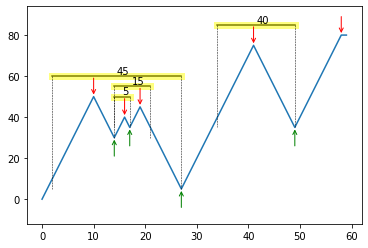

In [3]:
file = 'toy_drawdown2.csv'
data = np.array(pd.read_csv(file)).T.squeeze()
drawdowns = find_drawdowns(data)
df = pd.DataFrame(drawdowns)
df = df[df['magnitude']>0]
plot_ups_and_downs(data,drawdowns=df,min_loc=0, max_loc=len(data), offset=10)

## Run the Calhoun Data

In [4]:
file = 'calhounS.csv'

In [5]:
data = np.array(pd.read_csv(file)).T.squeeze()
drawdowns = find_drawdowns(data)
df = pd.DataFrame(drawdowns)
df = df[df['magnitude']>0]

There are 1777 total downvals
There are 1776 total upvals


### Generate some summary data across the drawdowns

In [6]:
df[['magnitude','duration','filling','draining']].describe()

,magnitude,duration,filling,draining
count,1774.000000,1774.000000,1774.000000,1774.000000
mean,18.561980,21.056933,174.316023,91.469564
std,71.700135,229.345302,312.675313,199.602869
min,0.012257,0.000000,0.012257,0.013539
25%,1.637223,0.000000,5.553772,2.800568
50%,4.432231,4.000000,32.330068,8.132409
75%,11.123853,8.000000,225.705529,64.980185
max,1337.611086,8807.000000,1999.801403,1337.611086


### Make some distribution plots

([<matplotlib.axis.XTick at 0x7fe3186d22d0>,
 <a list of 5 Text xticklabel objects>)

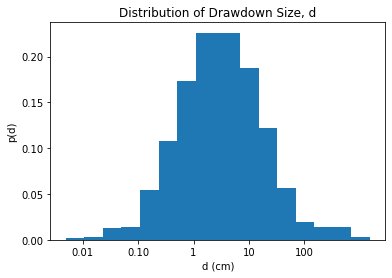

In [7]:
y,x = np.histogram(np.log10(df['magnitude']),bins=15)
y = y/np.sum(y)
plot.bar(x[0:-1],y)
plot.title('Distribution of Drawdown Size, d')
plot.xlabel('d (cm)')
plot.ylabel('p(d)')
plot.xticks(ticks=[-2, -1, 0, 1, 2],labels=['0.01','0.10','1','10','100'])

Text(0.5, 1.0, 'CDF of Drawdown Sizes, F(d)')

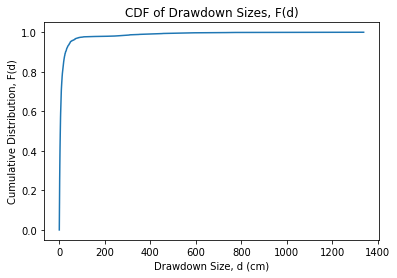

In [8]:
x, y = cum_dist(df['magnitude'])
plot.plot(x,y)
plot.xlabel('Drawdown Size, d (cm)')
plot.ylabel('Cumulative Distribution, F(d)')
plot.title('CDF of Drawdown Sizes, F(d)')

### Make a Drawdown Plot for the Calhoun data just for fun...

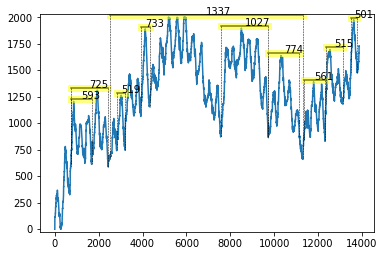

In [13]:
threshold=500  # Minimum size of drawdowns to label
min_loc=0      # First value of the dataseries to plot
max_loc=13877  # Last value of the dataseries to plot

plot_ups_and_downs(
    data,drawdowns=df,
    threshold=threshold,
    show_up_locs=False,show_down_locs=False,
    min_loc=min_loc, max_loc=max_loc,
    offset=20)